## Analysis of gold price development in an economic crash


The inspiration for this analysis is this <a href='https://www.reddit.com/r/dataisbeautiful/comments/fjvtt5/oc_current_market_sell_off_compared_to_major_ones/'> reddit post</a>, where the current crash is compared to major ones in the past.

Gold is generally known as the safe haven for investors in such crises and is therefore the profiteur of uncertain times. But is this really the case?

### Data

The gold price data is from Quandl. Quandl is a data provider, which offers acess to all sorts of quantitative data. I used it because I can query the gold price in usd from 1968 till now for free.

To identify dates for the crashes in the reddit post, I used <a href='https://en.wikipedia.org/wiki/List_of_economic_crise'>wikipedia</a> and data from the S&P500, since gold is mostly tarded in USD and the S&P 500 is one of the most commonly followed equity indices, and many consider it to be one of the best representations of the U.S. stock market. The range of dates is from the high to the bottom of the crash  
    
Starting and end dates for major crashes in the scope of our timeframe (from 1968):

- 1970s energy crisis: 11.05.1969 - 10.05.1970
- 1973 oil crisis: 02.01.1973 - 29.09.1974
- Early 1980s recession: 24.11.1980 - 02.08.1982
- Black Monday: 17.08.1987 - 30.11.1987
- Dot-com bubble: 20.03.2000 - 30.09.2002
- Financial crisis of 2007–08: 08.10.2007 - 02.03.2009
- Corona (2020): 10.02.2020 - till now (29.04.2020)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import time
from datetime import datetime
from yahoofinancials import YahooFinancials
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# ignore SettingWithCopyWarning:
pd.options.mode.chained_assignment = None

### Get the gold price

In [2]:
quandl.ApiConfig.api_key = 'XnamVpFfvrHtET7MCj5L'

In [3]:
# get the Data from quadl
# we only need the second column (USD(PM))
gold_data = quandl.get('LBMA/GOLD.2')

In [4]:
# save dataframe to csv, to have a local copy, since we don't want to make an api request everytime we rerun this script
gold_data.to_csv('gold_data.csv')

In [ ]:
# gold_data = pd.read_csv('gold_data_csv')
# gold_data['Date'] = pd.to_datetime(gold_data['Date'])
# gold_date = gold_data.set_index('date')

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13091 entries, 1968-04-01 to 2020-05-07
Data columns (total 1 columns):
USD (PM)    13091 non-null float64
dtypes: float64(1)
memory usage: 204.5 KB


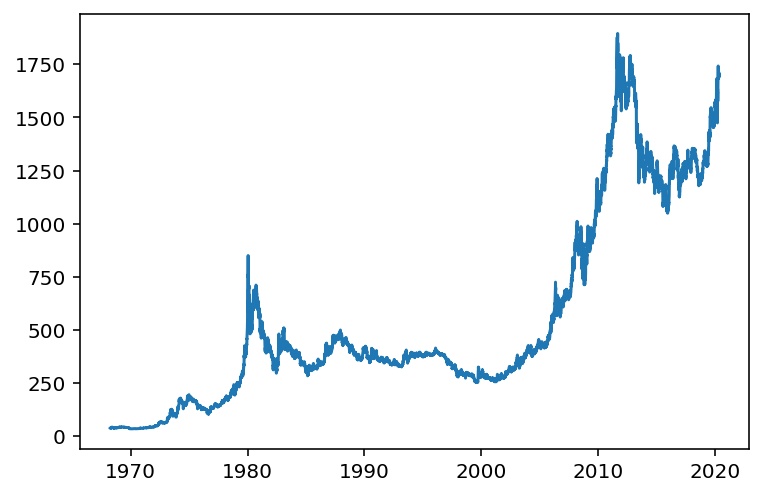

In [6]:
plt.plot(gold_data);

### Get S&P 500 data

In [ ]:
ticker = '^GSPC'
yahoo_financials = YahooFinancials(ticker)

In [ ]:
sp500 = yahoo_financials.get_historical_price_data(start_date='1968-04-01', end_date='2020-05-02', time_interval='daily')['^GSPC']['prices']

In [ ]:
dates = []
adj_close = []

for x in range(len(sp500)):
    date = sp500[x]['formatted_date']
    value = sp500[x]['adjclose']
    
    dates.append(date)
    adj_close.append(value)

In [ ]:
d = {'date' : dates, 'value' : adj_close}
sp_500 = pd.DataFrame(d)

In [ ]:
sp_500['date'] = pd.to_datetime(sp_500['date'])
sp_500 = sp_500.set_index('date')

In [ ]:
sp_500

### Create DataFames for each crisis

In [7]:
# 1970s energy crisis: 11.05.1969 - 10.05.1970
energy_crisis_1970 = gold_data.loc['1969-05-12':'1970-09-10']
# 1973 oil crisis: 02.01.1973 - 29.09.1974
oil_crisis_1973 = gold_data.loc['1973-01-02':'1974-09-30']
# Early 1980s recession: 24.11.1980 - 02.08.1982
early_1980s_recession = gold_data.loc['1980-11-24':'1982-08-02']
# Black Monday: 17.08.1987 - 30.11.1987
black_monday = gold_data.loc['1987-08-17':'1987-11-30']
# Dot-com bubble: 20.03.2000 - 30.09.2002
dot_com_bubble = gold_data.loc['2000-03-20':'2002-09-30']
# Financial crisis of 2007–08: 08.10.2007 - 02.03.2009
financial_crisis_2007 = gold_data.loc['2007-10-08':'2009-03-02']
# Corona (2020): 10.02.2020 - till now (01.05.2020)
corona_2020 = gold_data.loc['2020-02-10':'2020-05-07']

In [8]:
# calculate cumulative ptc change for each crisis
energy_crisis_1970['sum_ptc_change'] = energy_crisis_1970['USD (PM)'].pct_change().cumsum()
oil_crisis_1973['sum_ptc_change'] = oil_crisis_1973['USD (PM)'].pct_change().cumsum()
early_1980s_recession['sum_ptc_change'] = early_1980s_recession['USD (PM)'].pct_change().cumsum()
black_monday['sum_ptc_change'] = black_monday['USD (PM)'].pct_change().cumsum()
dot_com_bubble['sum_ptc_change'] = dot_com_bubble['USD (PM)'].pct_change().cumsum()
financial_crisis_2007['sum_ptc_change'] = financial_crisis_2007['USD (PM)'].pct_change().cumsum()
corona_2020['sum_ptc_change'] = corona_2020['USD (PM)'].pct_change().cumsum()

In [9]:
# create days from top
energy_crisis_1970['days_in_crisis'] = np.arange(0,len(energy_crisis_1970), 1)
oil_crisis_1973['days_in_crisis'] = np.arange(0,len(oil_crisis_1973), 1)
early_1980s_recession['days_in_crisis'] = np.arange(0,len(early_1980s_recession), 1)
black_monday['days_in_crisis'] = np.arange(0,len(black_monday), 1)
dot_com_bubble['days_in_crisis'] = np.arange(0,len(dot_com_bubble), 1)
financial_crisis_2007['days_in_crisis'] = np.arange(0,len(financial_crisis_2007), 1)
corona_2020['days_in_crisis'] = np.arange(0,len(corona_2020), 1)

In [10]:
# create function to get the gold prices before the crisis
def p_crisis(df, from_date, d):
    '''
    df = DataFrame
    from_date = Date from which we start counting back
    d = how many days
    '''
    
    # claculate the start day for a period of x days
    end = datetime.strptime(from_date, '%Y-%m-%d')
    start = end - pd.offsets.Day(d)
    # inspired by https://stackoverflow.com/questions/40192704/filter-pandas-dataframe-for-past-x-days
    
    # create the DataFrame with the dates
    df = df.loc[start:from_date]
    
    # sort the index to calcilate cumulative sum
    df.sort_index(ascending = False, inplace = True)
    df['sum_ptc_change'] = df['USD (PM)'].pct_change().cumsum()
    
    # create days in crisis 
    df['days_in_crisis'] = np.arange(0,-len(df), -1)
    
    # redo sort index 
    df.sort_index(ascending = True, inplace = True)
    
    # exclude the last row because it would be dublicated by appending the DataFrames
    df = df.iloc[:-1]
    
    return df

In [11]:
# create the DataFrame with 
p_1970 = p_crisis(gold_data, '1969-05-12', 100)
p_1973 = p_crisis(gold_data, '1969-01-02', 100)
p_1980 = p_crisis(gold_data, '1980-11-24', 100)
p_1987 = p_crisis(gold_data, '1987-08-17', 100)
p_2000 = p_crisis(gold_data, '2000-03-20', 100)
p_2007 = p_crisis(gold_data, '2007-10-08', 100)
p_2020 = p_crisis(gold_data, '2020-02-10', 100)

In [12]:
# function to append DataFrames
def append_DataFrame(p_df, c_df):
    '''
    p_df = DataFrame containing the prices prio crisis 
    c_df = DataFrame containign the prices in the crisis    
    '''
    df = p_df.append(c_df)
    return df

In [13]:
# create the finale DataFrame with the data before and during the crisis
energy_crisis_1970 = append_DataFrame(p_1970, energy_crisis_1970)
oil_crisis_1973 = append_DataFrame(p_1973, oil_crisis_1973)
early_1980s_recession = append_DataFrame(p_1980, early_1980s_recession)
black_monday = append_DataFrame(p_1987, black_monday)
dot_com_bubble = append_DataFrame(p_2000, dot_com_bubble)
financial_crisis_2007 = append_DataFrame(p_2007, financial_crisis_2007)
corona_2020 = append_DataFrame(p_2020, corona_2020)

#### Create the chart

In [14]:
# set the style to give the chart a grid
sns.set_style('whitegrid')

In [15]:
ticks = np.arange(-0.75, 1.25, 0.25)
tick_names = ['-75%', '-50%', '-25%', '0%', '+25%', '+50%', '+75%', '+100%']

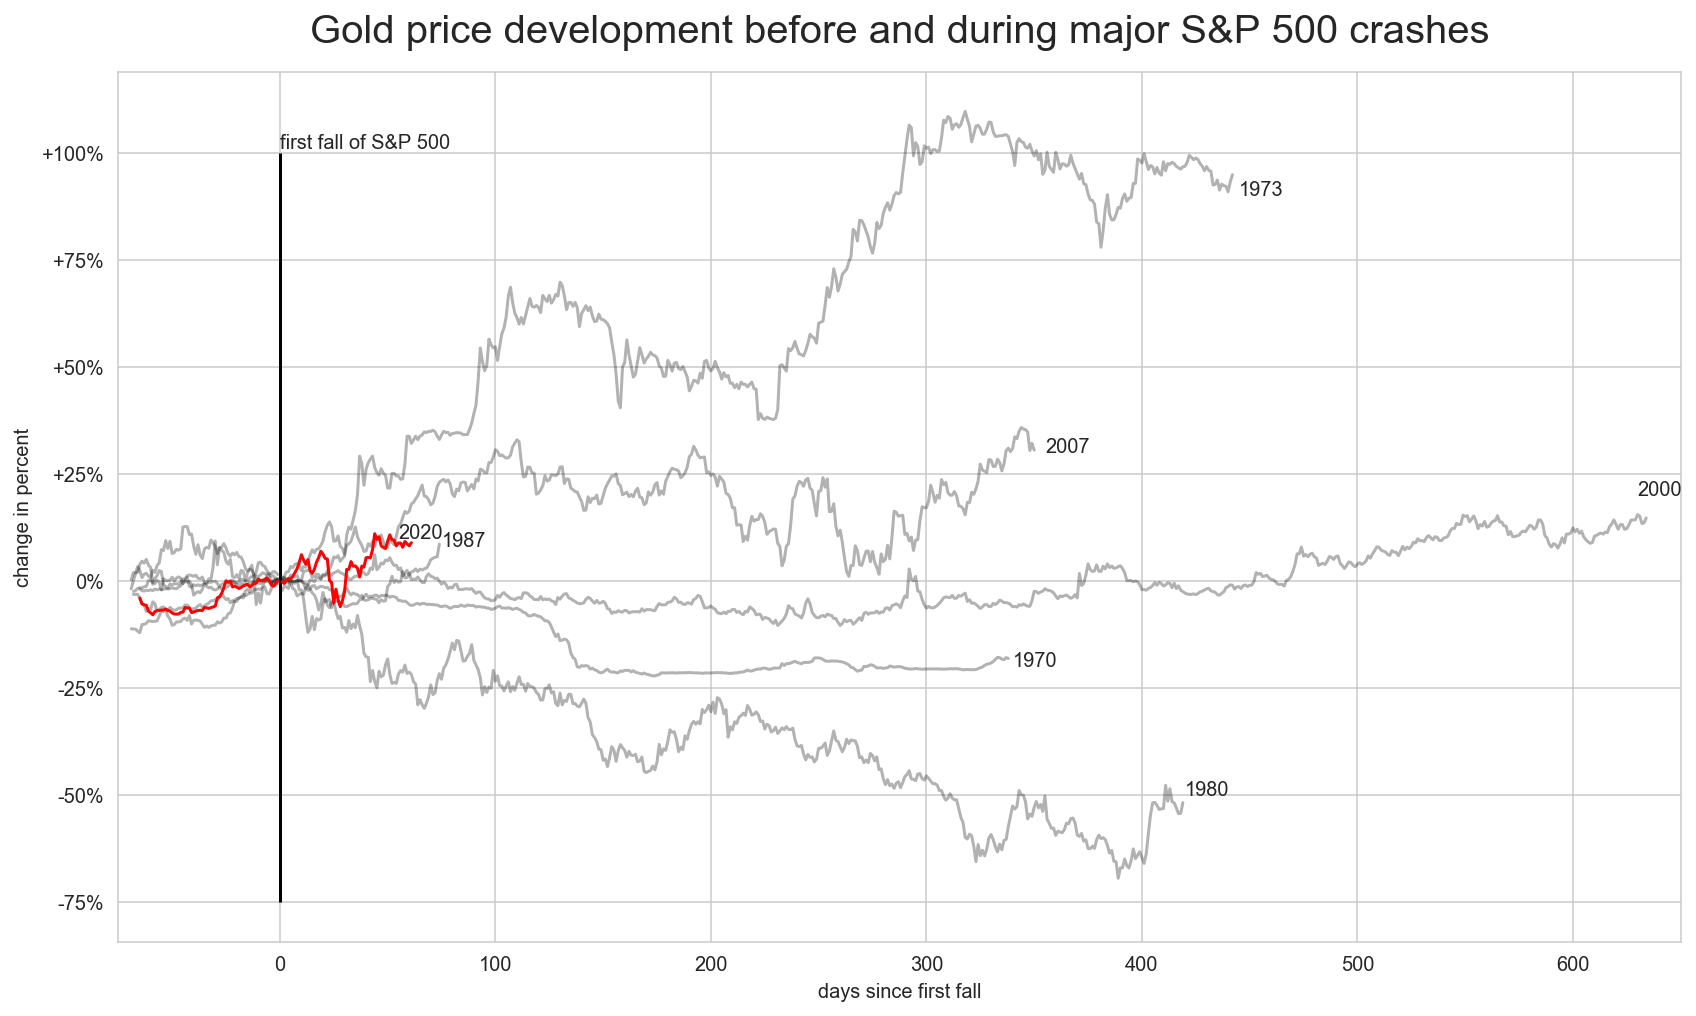

In [16]:
plt.subplots(figsize=(14,8))

plt.plot(energy_crisis_1970['days_in_crisis'], energy_crisis_1970['sum_ptc_change'], label='1970', color='k', alpha=0.3)
plt.plot(oil_crisis_1973['days_in_crisis'], oil_crisis_1973['sum_ptc_change'], label='1973', color='k', alpha=0.3)
plt.plot(early_1980s_recession['days_in_crisis'], early_1980s_recession['sum_ptc_change'], label='1980', color='k', alpha=0.3)
plt.plot(black_monday['days_in_crisis'], black_monday['sum_ptc_change'], label='1987', color='k', alpha=0.3)
plt.plot(dot_com_bubble['days_in_crisis'], dot_com_bubble['sum_ptc_change'], label='2000', color='k', alpha=0.3)
plt.plot(financial_crisis_2007['days_in_crisis'], financial_crisis_2007['sum_ptc_change'], label='2007', color='k', alpha=0.3)
plt.plot(corona_2020['days_in_crisis'], corona_2020['sum_ptc_change'], label='2020', color='r')

plt.annotate('1970', xy=(340, -0.2))
plt.annotate('1973', xy=(445, 0.9))
plt.annotate('1980', xy=(420, -0.5))
plt.annotate('1987', xy=(75, 0.08))
plt.annotate('2000', xy=(630, 0.2))
plt.annotate('2007', xy=(355, 0.3))
plt.annotate('2020', xy=(55, 0.10))

plt.vlines(0, colors='k', ymin=-0.75, ymax=1)
plt.annotate('first fall of S&P 500', xy=(0, 1.01))

plt.xlim(-75,650)
plt.yticks(ticks, tick_names)
plt.title('Gold price development before and during major S&P 500 crashes', fontsize=20, pad=15)
plt.xlabel('days since first fall')
plt.ylabel('change in percent')
plt.savefig('Gold_price_development_during_crashes.png', dpi=300);

## Conclusions

In [ ]:
# To-Do
# add one one charts with gold price development in comparison to S&P 500
# add more functions to clean up to code
# do the visualization with different libraries: Bokeh, plotly

## Limitations
- the scope of this project is just the price development between the high and the low of the S&P 500 crash. So any price devleopment after or before the crash isn't visualized. Further research could take this into consideration and plot the gold price before and after a crash. So two possible questions could be answerd: how is the gold price development before and after a crash?

## Resources
- https://www.quandl.com/data/LBMA-London-Bullion-Market-Association
- https://finance.yahoo.com/quote/%5EGSPC/
- https://stackoverflow.com/questions/35090498/how-to-calculate-percent-change-compared-to-the-beginning-value-using-pandas
- https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas